# Discretization (or binning): numerical -> categorical data
## fixed bins - `.pd.cut()`
Example: discretize age number to three groups:
- Child (0-17)
- Adult (18-64)
- Senior (65+)

In [11]:
import pandas as pd
import numpy as np

# Create Data

np.random.seed(42)

df = pd.DataFrame({
    "age": np.random.randint(1, 90, 20)
})

df.head()

,age
0,52
1,15
2,72
3,61
4,21


<Axes: >

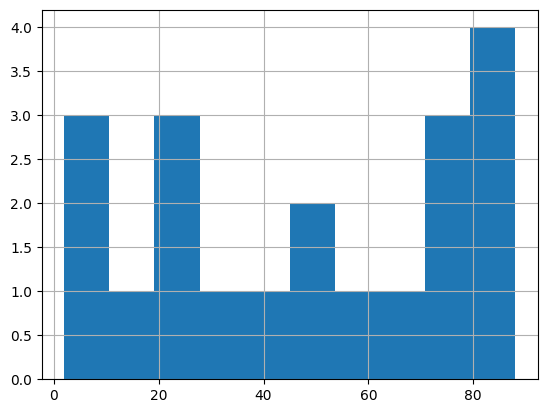

In [13]:
# visualize the numerical values of age
df["age"].hist()

In [20]:
# Fixed Binning with pd.cut()

df["age_group"] = pd.cut(
    x=df["age"],
    bins=[0, 17, 64, 100],
    labels=["Child", "Adult", "Senior"]
)

df

,age,age_group
0,52,Adult
1,15,Child
2,72,Senior
3,61,Adult
4,21,Adult
5,83,Senior
6,87,Senior
7,75,Senior
8,75,Senior
9,88,Senior


In [23]:
# Let's count distributions
df["age_group"].value_counts(sort=False) # sort=False to preserve the categorical order

age_group
Child     4
Adult     9
Senior    7
Name: count, dtype: int64

<Axes: xlabel='age_group'>

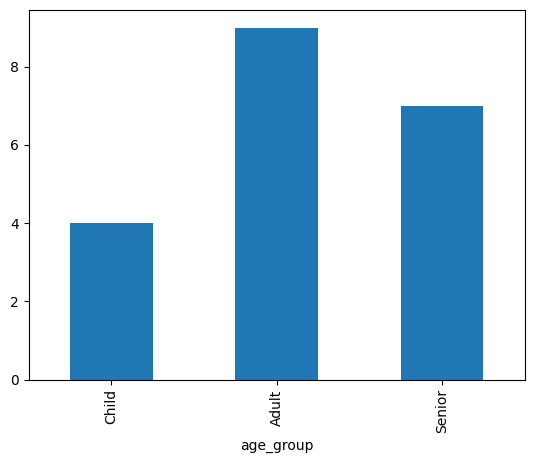

In [24]:
# visualize the age group
df['age_group'].value_counts(sort=False).plot(kind="bar")

## quantile binning - `pd.qcut()`
Groups are balanced, unlike fixed bins.

example: income binned to low, medium, and high based on quantiles

In [25]:
df["income"] = np.random.normal(60000, 20000, 20).round(0)
df

,age,age_group,income
0,52,Adult,60444.0
1,15,Child,51444.0
2,72,Senior,49364.0
3,61,Adult,57650.0
4,21,Adult,64442.0
5,83,Senior,44640.0
6,87,Senior,62849.0
7,75,Senior,59307.0
8,75,Senior,82687.0
9,88,Senior,57905.0


In [27]:
# Quantile Binning with pd.qcut(). Useful for ranking or segmentation.
df["income_group"] = pd.qcut(
    df["income"],
    q=3, #q=3 means 3 equal-sized groups, and each group has roughly the same number of observations.
    labels=["Low", "Middle", "High"]
)

df

,age,age_group,income,income_group
0,52,Adult,60444.0,Middle
1,15,Child,51444.0,Low
2,72,Senior,49364.0,Low
3,61,Adult,57650.0,Middle
4,21,Adult,64442.0,High
5,83,Senior,44640.0,Low
6,87,Senior,62849.0,Middle
7,75,Senior,59307.0,Middle
8,75,Senior,82687.0,High
9,88,Senior,57905.0,Middle


In [31]:
# Compare Counts: each group has almost the same number of counts
df["income_group"].value_counts(sort=False)

income_group
Low       7
Middle    6
High      7
Name: count, dtype: int64

<Axes: xlabel='income_group'>

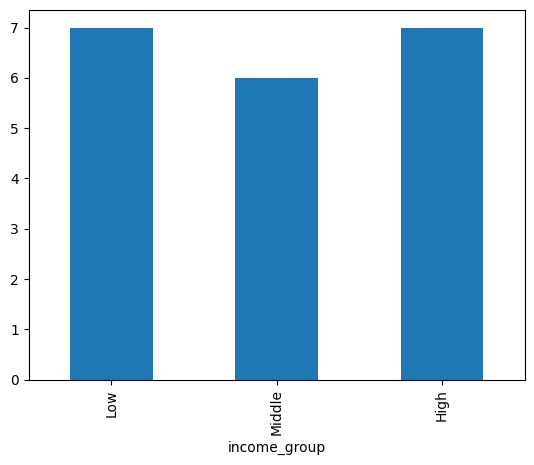

In [32]:
# visualize
df["income_group"].value_counts(sort=False).plot(kind='bar')

In [29]:
# If we use pd.cut() in stead of pd.qcut() here, it will generate three groups with relatively similar width of the value, instead of similar number of counts
df['income_group_cut'] = pd.cut(df['income'], bins=3)
df

,age,age_group,income,income_group,income_group_cut
0,52,Adult,60444.0,Middle,"(45729.0, 71992.0]"
1,15,Child,51444.0,Low,"(45729.0, 71992.0]"
2,72,Senior,49364.0,Low,"(45729.0, 71992.0]"
3,61,Adult,57650.0,Middle,"(45729.0, 71992.0]"
4,21,Adult,64442.0,High,"(45729.0, 71992.0]"
5,83,Senior,44640.0,Low,"(19387.211, 45729.0]"
6,87,Senior,62849.0,Middle,"(45729.0, 71992.0]"
7,75,Senior,59307.0,Middle,"(45729.0, 71992.0]"
8,75,Senior,82687.0,High,"(71992.0, 98255.0]"
9,88,Senior,57905.0,Middle,"(45729.0, 71992.0]"


In [33]:
# count number of people in each group, notice the count is NOT balanced
df['income_group_cut'].value_counts(sort=False)

income_group_cut
(19387.211, 45729.0]     4
(45729.0, 71992.0]      11
(71992.0, 98255.0]       5
Name: count, dtype: int64

<Axes: xlabel='income_group_cut'>

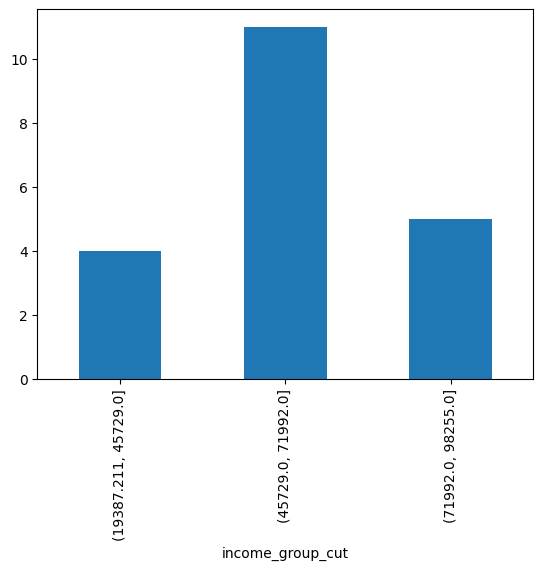

In [34]:
# visualize
df['income_group_cut'].value_counts(sort=False).plot(kind='bar')

In [ ]:
df['income'].plot(kind='hist', )